In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import sys
import os


scripts_dir = os.path.abspath('../scripts')
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Importar el archivo viztools.py
import viztools as v

# Al leer el archivo CSV que se matengan las modificaciones en los dtypes de dates
df = pd.read_csv("../data/superstore_clean.csv", parse_dates=['Order Date', 'Ship Date'])

In [41]:
# cargar cuando modifique las funciones o incluya nuevas
importlib.reload(v)

<module 'viztools' from '/Users/jaimeinchaurraga/Documents/GitHub/03_EDA_Superstore_23/scripts/viztools.py'>

# **Análisis Multivariante de Variables Categóricas**

En esta sección se va a realizar un análsis gráfico entre variables categóricas. Primero se realizará una comprativa visual bivariante entre las combinaciones más interesantes desde el punto de vista de negocio  
que pueda servir como un primer punto de partida. En caso de encontrar alguna relación interesante, se continuará el análisis mediante tests matemáticos apropiados o incluso ampliado el análsis visual,  
haciendo uso de otras gráficas o incluyendo más variables categóricas.


# Índice

1. **Relación entre `Order Profitable` y Categóricas**  
    1.1 Relación entre `Category` vs `Order Profitable`  
    1.2 Relación entre `Segment` vs `Order Profitable`  
    1.3 Relación entre `Ship Mode` vs `Order Profitable`  
    1.4 Relación entre `Ship Status` vs `Order Profitable`  

2. Relación entre `Segment` vs `Ship Mode`  

3. Relación entre `Category` vs `Ship Mode`  

4. Relación entre `Segment` vs `Category`  

5. Relación entre `Ship Mode` vs `Ship Status`  

6. Análisis entre `State` vs variables categóricas clave  
    6.1 Relación entre `State` vs `Order Profitable`  
    6.2 Relación entre `State` vs `Ship Mode`  
    6.3 Relación entre `State` vs `Ship Status`  
    6.4 Relación entre `State` vs `Category`  
    6.5 Relación entre `State` vs `Segment`  



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Customer Name           9994 non-null   object        
 3   Order Date              9994 non-null   datetime64[ns]
 4   Order Profitable?       9994 non-null   object        
 5   Product Name            9994 non-null   object        
 6   Region                  9994 non-null   object        
 7   Segment                 9994 non-null   object        
 8   Ship Date               9994 non-null   datetime64[ns]
 9   Ship Mode               9994 non-null   object        
 10  Ship Status             9994 non-null   object        
 11  State                   9994 non-null   object        
 12  Sub-Category            9994 non-null   object  

In [4]:
# Agrupar las variables categóricas y númericas para poder trabajar mejor 
categorical_columns = [
    'Category', 'City', 'Customer Name',
    'Order Profitable?', 'Product Name', 'Region', 'Segment',
    'Ship Mode', 'Ship Status', 'State', 'Sub-Category'
]

numerical_columns = [
    'Days to Ship Actual', 'Days to Ship Scheduled', 'Discount', 'Profit',
    'Quantity', 'Sales', 'Sales Forecast'
]
# Creo una nueva variable para agrupar las variables con datetime 
date_columns = [
    'Order Date','Ship Date'
]

## 1. **Relación entre `Order Profitable` y Categóricas**  

**¿Existe alguna causa aparente que provoque que un pedido no sea rentable, relacionada con alguna variable categórica?**


A continuación se realiza un análisis comparativo entre `Order_Profitable?` y el resto de las variables categóricas. El objetivo es tratar de analizar posibles causas que provoquen que un pedido no sea rentable

In [ ]:
#v.pinta_distribucion_categoricas(df,["Category","Order Profitable?"],relativa= True , mostrar_valores= True)

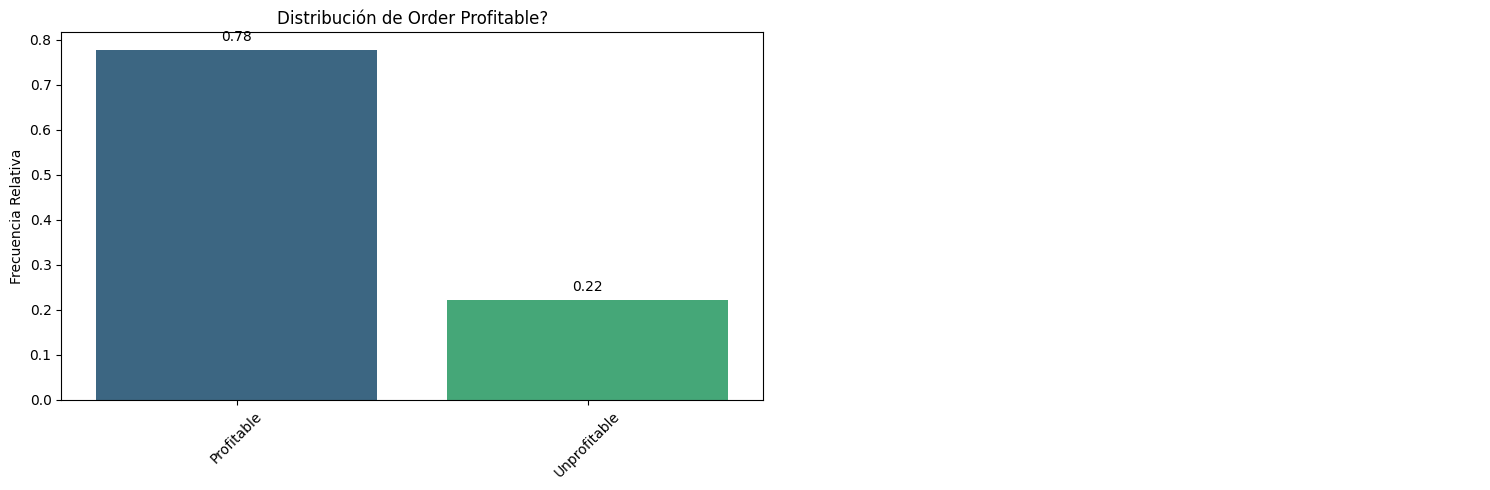

In [4]:
v.pinta_distribucion_categoricas(df, ['Order Profitable?'], relativa=True, mostrar_valores=True)

### 1.1 **Relación entre `Category` vs `Order Profitable`**  


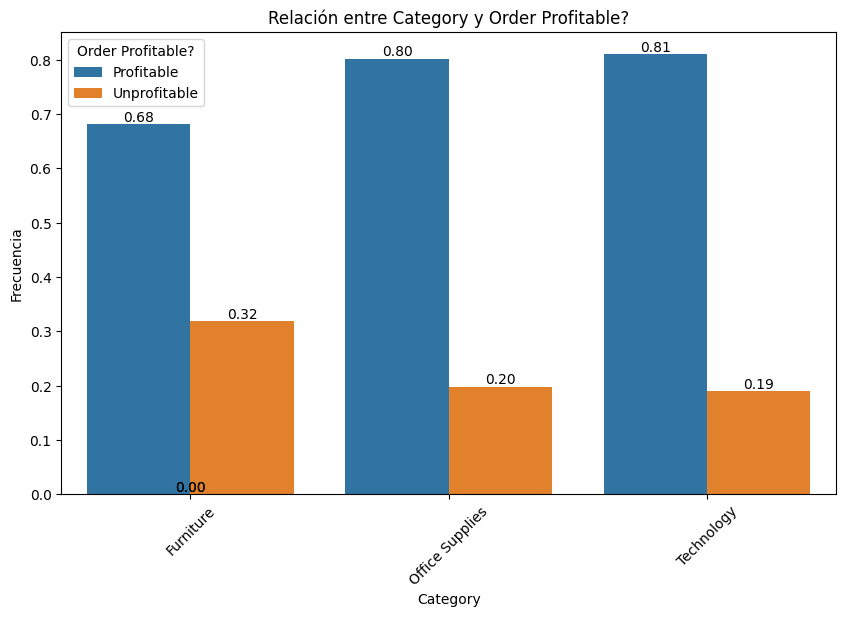

In [5]:
v.plot_categorical_relationship_fin(df,"Category","Order Profitable?",relative_freq = True, show_values= True)

### 1.2. **Relación entre `Segment` vs `Order Profitable`**  


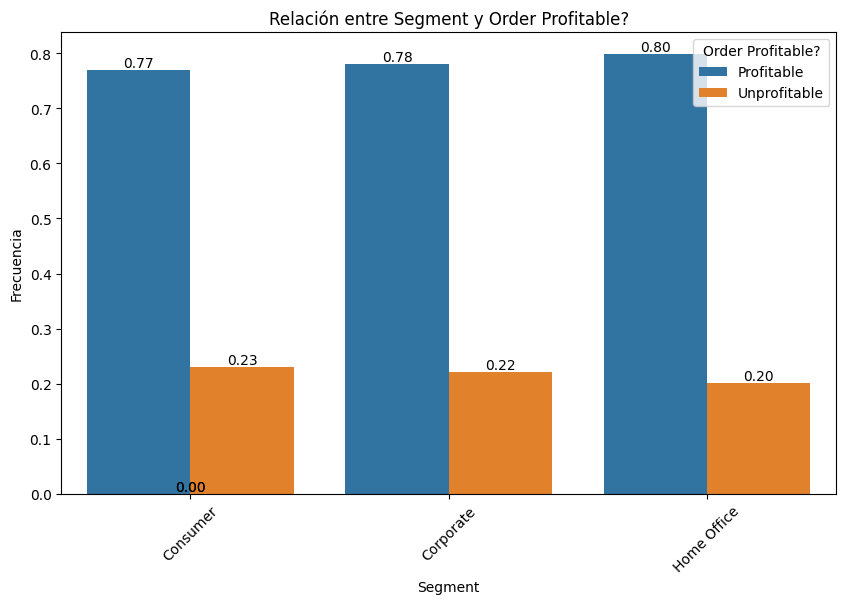

In [6]:
v.plot_categorical_relationship_fin(df,"Segment","Order Profitable?",relative_freq = True, show_values= True)

### 1.3 **Relación entre `Ship Mode` vs `Order Profitable`**  


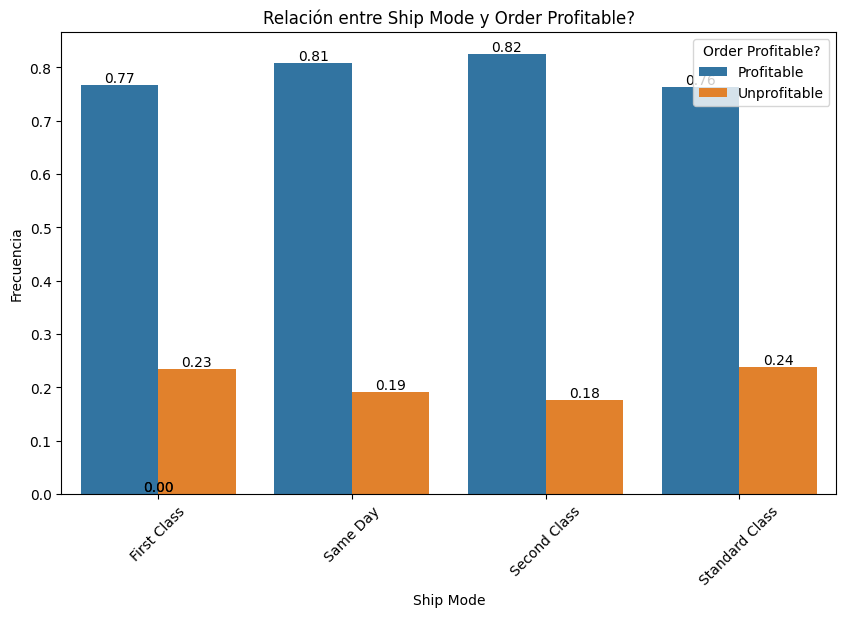

In [7]:
v.plot_categorical_relationship_fin(df,"Ship Mode","Order Profitable?",relative_freq = True, show_values= True)

### 1.4 **Relación entre `Ship Status` vs `Order Profitable`**  


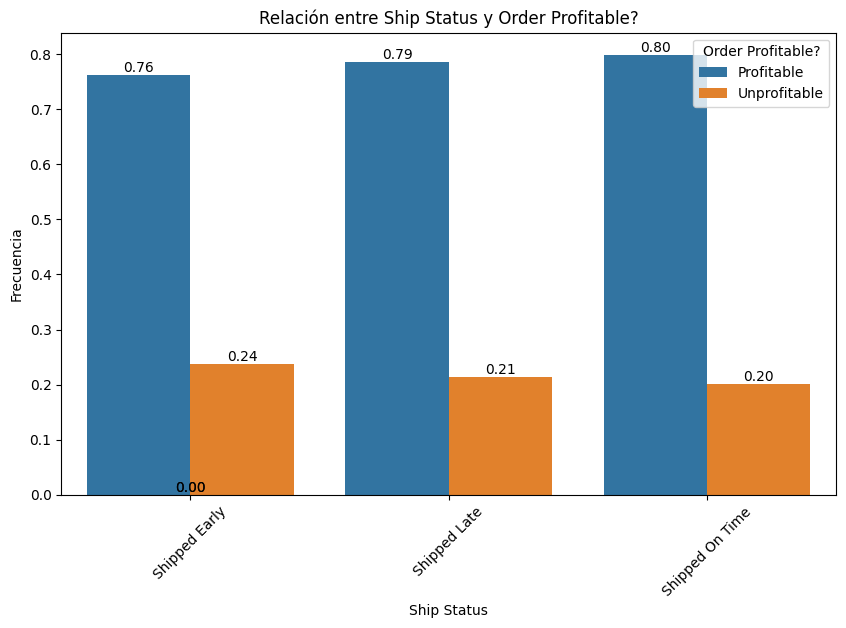

In [8]:
v.plot_categorical_relationship_fin(df,"Ship Status","Order Profitable?",relative_freq = True, show_values= True)

Como se puede observar en las gráficas de columnas, la proporción entre los pedidos que son y no son rentables en las principales variables categóricas se mantiene prácticamente igual, por lo que se descarta que guarden relación alguna.

### 2. **Relación entre `Segment` vs `Ship Mode`**  

**¿Existen diferencias en la preferencia por modos de envío entre diferentes segmentos de clientes?**

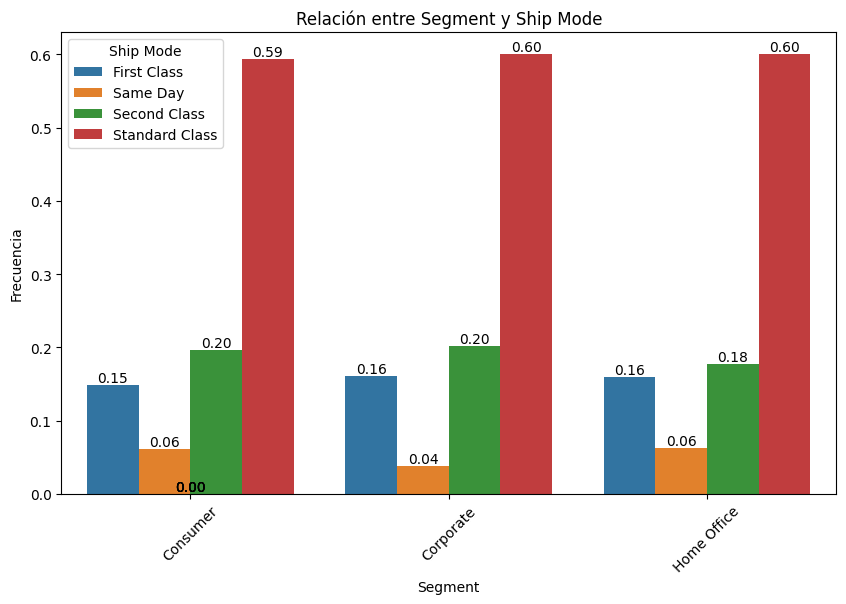

In [9]:
v.plot_categorical_relationship_fin(df,"Segment","Ship Mode",relative_freq = True, show_values= True)

Tras observar la gráfica se puede apreciar que la proporción de los diferentes modos de envío se mantiene bastante constante entre los distintos segmentos.  

- `Standard Class`: Es el modo de envío dominante en todos los segmentos, con aproximadamente el 60% en cada uno de ellos.  
- `Second Class`: También se mantiene consistente en torno al 20% en los tres segmentos.  
- `First Class` y `Same Day`: Tienen una proporción menor, y tampoco muestran diferencias significativas entre los segmentos.  

Esta uniformidad sugiere que el segmento de clientes no influye significativamente en la elección del modo de envío. Independientemente de si los clientes son consumidores, corporaciones, o trabajan desde casa, tienden a seleccionar los modos de envío en proporciones similares.

### 3. **Relación entre `Category` vs `Ship Mode`**  

**¿Existen diferencias en los envíos dependiendo de la categoría del producto?**

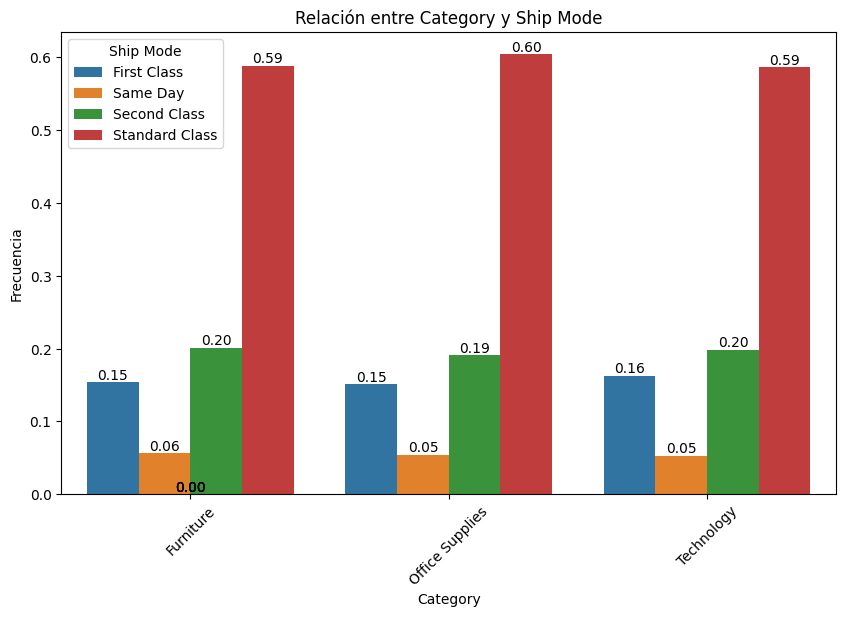

In [12]:
v.plot_categorical_relationship_fin(df,"Category","Ship Mode",relative_freq = True, show_values= True)

Al ver la gráfica se puede observar que la estrctura es muy similar a la anteriormente vista de `Segment` vs `Ship Mode`, por lo tanto se descarta que exista alguna evidencia clara que muestre una relación entre ambas variables

### 4. **Relación entre `Segment` vs `Category`**  

**¿Qué categorías de productos son más populares en cada segmento?**

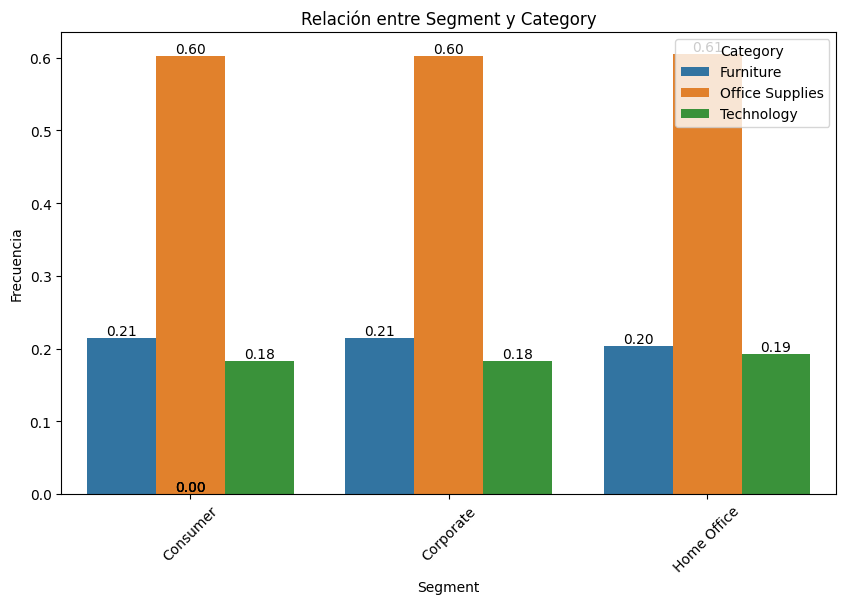

In [11]:
v.plot_categorical_relationship_fin(df,"Segment","Category",relative_freq = True, show_values= True)

Se continua con la misma dinámica anterior: las clases dentro de las variables se mantienen muy regulares sin indicar algún pico que pueda llamar la atención.  
Los diferentes segmentos de cliente obtienen proporciones muy similares de productos según su categoría.  

### 5. **Relación entre `Ship Mode` vs. `Ship Status`**  

**¿El modo de envío seleccionado tiene un impacto en la puntualidad del envío?**

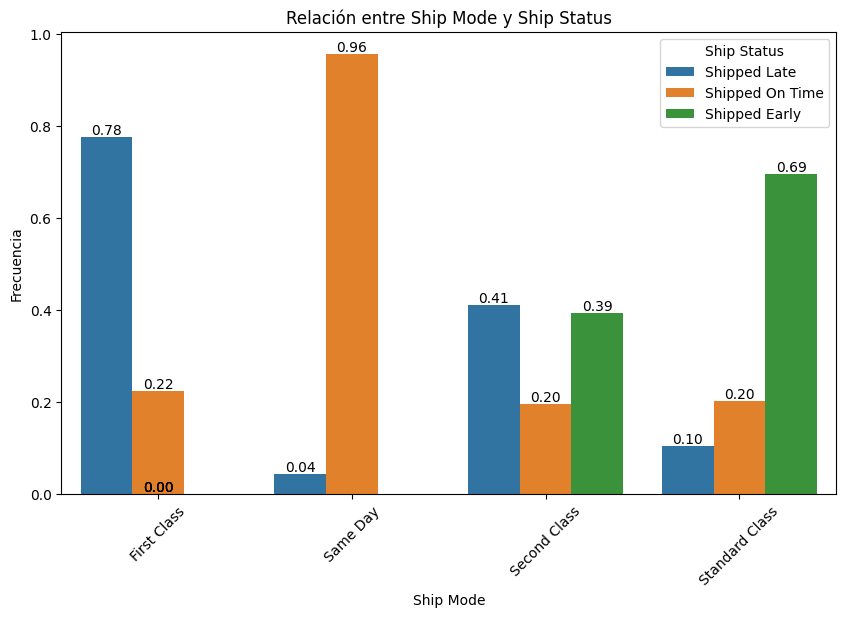

In [17]:
v.plot_categorical_relationship_fin(df,"Ship Mode","Ship Status",relative_freq = True, show_values= True)

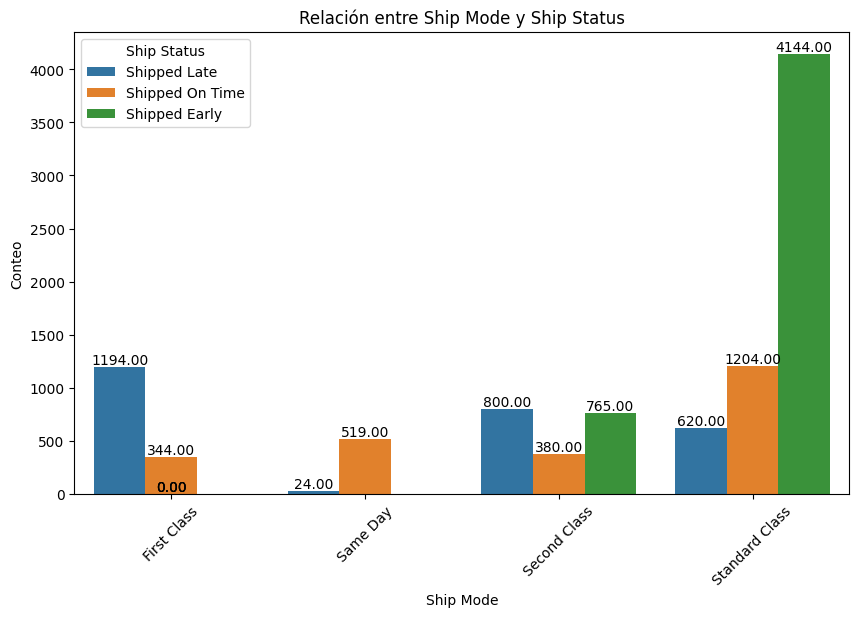

In [23]:
# dado que hay información relavante, parece interesante ver tanto la información abosulta como relativa (en porcentaje)
v.plot_categorical_relationship_fin(df,"Ship Mode","Ship Status",relative_freq = False, show_values= True)

In [21]:
# Doble check para confirmar los resultados de la gráfica
# Agrupar por Ship Status y aplicar value_counts sobre Ship Mode, normalizado para obtener porcentajes
percentages = df.groupby('Ship Mode')['Ship Status'].value_counts(normalize=True)

# Convertir a un DataFrame para tener una vista más clara
percentages = percentages.rename('percentage').reset_index()

# Mostrar el resultado
print(percentages)


        Ship Mode      Ship Status  percentage
0     First Class     Shipped Late    0.776333
1     First Class  Shipped On Time    0.223667
2        Same Day  Shipped On Time    0.955801
3        Same Day     Shipped Late    0.044199
4    Second Class     Shipped Late    0.411311
5    Second Class    Shipped Early    0.393316
6    Second Class  Shipped On Time    0.195373
7  Standard Class    Shipped Early    0.694370
8  Standard Class  Shipped On Time    0.201743
9  Standard Class     Shipped Late    0.103887


Para ver si dos variables categóricas presentan alguna relación (cambios conjuntos, cambios en una de un tipo se dan al mismo tiempo que cambios de otro tipo en la otra, etc) se realizó el análisis visual.  
Ese análisis visual ya nos dice si existe la relación, pero si mis datos no son todos o quiero extrapolarlos, tengo que ganar confianza en lo que he "visto" en el análisis visual y para ello se aplican los test.  

En este caso, en principio la compañía nos ha dado todos los datos de los que disponía, pero igualemnte, a modo de doble check se va a realizar el test numérico.

Para ello, se va a utilizar el `test de Chi-cuadrado`, una prueba estadística que se utiliza para determinar si existe una relación significativa entre dos variables categóricas.  
Este test compara las frecuencias observadas con las frecuencias esperadas (que asumirían que no existe relación entre las variables)

In [50]:
# se extrae la tabla de las frecuencias
tabla_contingencia_shipmode_shipstatus = pd.crosstab(df['Ship Mode'], df['Ship Status'])

tabla_contingencia_shipmode_shipstatus

Ship Status,Shipped Early,Shipped Late,Shipped On Time
Ship Mode,,,
First Class,0,1194,344
Same Day,0,24,519
Second Class,765,800,380
Standard Class,4144,620,1204


In [51]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_shipmode_shipstatus)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 5118.493155159457
P-Value: 0.0
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[ 755.45747448  405.96798079  376.57454473]
 [ 266.71873124  143.32939764  132.95187112]
 [ 955.37372423  513.39903942  476.22723634]
 [2931.45007004 1575.30358215 1461.24634781]]


- El valor Chi- cuadrado es muy alto, lo que indica que la diferencia entre las frecuencias observadas y las esperadas (esperadas en el caso de que no tuvieran relación)  
- el p. value es de 0, lo que indica que que existe una relación total entre ambas variables (un valor menor a 0.05 ya rechaza la hipótesis de que las variables son independientes)

Por primera vez, se obtiene una gráfica con datos que pueden ser muy relevantes para mejorar la productividad y eficiencia de la compañía:  

- `Same day`: La opción menos solicitada a la hora de realizar un envío. La eficiencia es extremadamente alta, ya que más del 95% de los pedidos son entregados en la fecha estipulada.  
Es entendible que no haya pedidos en la categoría 'Shipped Early' dado que no puede tardar menos de un día.      
- `First Class`: Sin duda, se trata de la categoría que más llama la atención: La ineficiencia es bastante elevada, ya que casi el 80% de los pedidos son entregados fuera de plazo.  
Como es lógico, es de las opciones menos solicitadas, seguramente por su precio. Sería prioritario entender a fondo la causa; resulta inaceptable desde el punto de vista de un cliente.  
Hay que recordar que aproximadamente un 15% del total de cada segmento de clientes ('Corporate', 'Consumer, 'Home Office') realizan envíos eligiendo esta opción. Se debe tener un contacto urgente  
con negocio y logística para revertir esta situación cuanto antes.  
- `Second Class`: Se trata de un caso curioso. Por un lado, sigue habiendo una gran cantidad de porcentaje de envíos que no cumplen con la fecha de llegada acordada (40% aprox.).  
En contraste, otro 40% de los envíos son entregados antes del límite establecido, seguido de un 20% que llega a tiempo. Tal vez tendría sentido realizar un esfuerzo por reducir el número de pedidos   
que llegan tarde, a costa de reducir aquellos envíos que llegan antes de tiempo. Claro que probablemente haya razones más complejas en la logística en las cuales se tenga que profundizar.  
- `Standard Class`: La opción más solicitada con mucha diferencia. Vuele a llamar la atención que el 70% de los pedidos se entregen antes de tiempo. Al menos en esta categoría el porcentaje de envíos  
con retrasos es mucho más reducido (10% aprox) aunque igualmente debería ser una prioridad a mejorar (Aunque sea un porcentaje más bajo el número de pedidos es muy elevado teniendo en cuenta que es la opción con más pedidos en términos absolutos)  

Conclusión:  
- La prioridad principal sería entender las causas principales de los pedidos que tienen retrasos, especialmente en las opciones más premium donde en términos relativos son bastante comunes.  
- No tiene sentido que cuando los clientes eligan las opciones con precios más elevados (seguramente lo hagan por urgencias), las probabilidades de que sus pedidos no lleguen a tiempo sean tan altas.  
- Tener tantos envíos tempranos puede ser más negativo de lo que parece. Aunque el cliente pueda percibirlo como algo positivo y que por tanto la reputación de la marca mejore, desde el punto de vista logístico,  
se pueden estar produciendo sobrecostes que pueden jugar un papel negativo en los números de la compañía.
- Mejor no tener envíos tardíos y tempranos. Enfocar mejoras para conseguir que la categoría "Shipped on Time" aumente



## 6. **Análisis entre `State` vs variables categóricas clave**  

En la siguiente sección se procede a realizar un análisis que relaciona los estados con otras variables categóricas. Se han seleccionado aquellas consideradas más relevantes desde el punto de vista de negocio.  
Dado el gran número de estados activos con pedidos, el análisis se va a centrar en las características generales más destacadas. En caso de que negocio requiera obtener insights de estados específicos se procedería más adelante

### 6.1. **Relación entre `State` vs. `Order Profitable`**  

**¿Existe algún tipo de patrón referente a si los pedidos son rentables en los diferentes estados?**

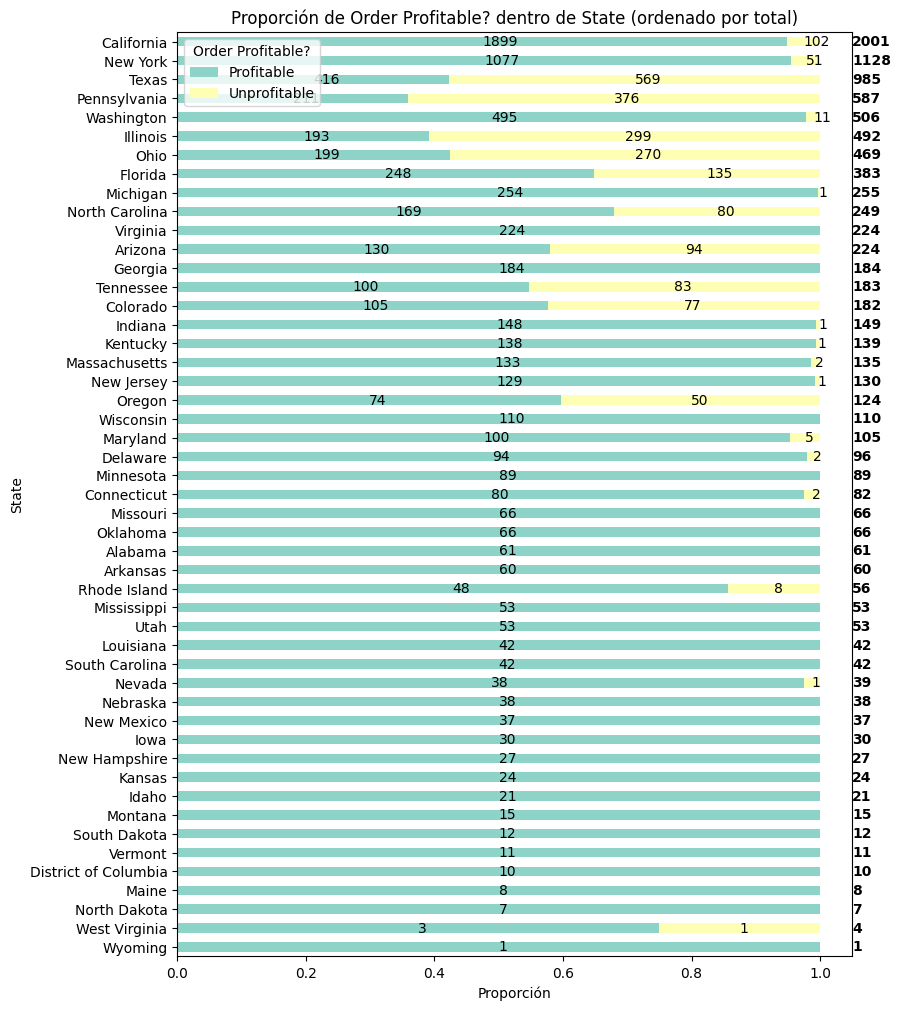

In [42]:
v.plot_categorical_composition(df, 'State', 'Order Profitable?')


In [ ]:
# doble check de que los datos de la función son correctos
#df['State'].value_counts()

In [ ]:
# doble check de que los datos de la función son correctos (II)
#sts_pr = df.groupby('State')['Order Profitable?'].value_counts(normalize=False)

# Convertir a un DataFrame para tener una vista más clara
#sts_pr = sts_pr.rename('percentage').reset_index()

# Mostrar el resultado
#print(sts_pr)

En la gráfica aparecen los diferentes estados con su distribución de pedidos y la proporción de los que sí y no han sido rentables.  
- En términos generales aproximadamente un 77% total de pedidos han sido rentables frente a aproximadamente un 22% que no lo han sido.  
- La mayor parte de los pedidos no rentables se encuentran en las ciudades con más pedidos. Destaca el hecho de que en varias de estas ciudades la proporción negativa es incluso mayor.  
De acuerdo con la gráfica, los cinco estados con más pedidos (California, Nueva York, Texas, Pensilvania y Washington) presentan un alto número de pedidos no rentables:  
    - California: Aunque tiene el mayor número de pedidos (2001), tiene también un 5.1% de pedidos no rentables (102 de 2001).  
    - Texas: Un caso notable es Texas, donde el 57.8% de los pedidos no son rentables (569 de 985).  
    - Pensilvania: Presenta un 64% de pedidos no rentables, uno de los porcentajes más altos (376 de 587).  
- Parece que según bajan el número de pedidos totales, también lo hacen los pedidos no rentables; de hecho desde mitad de tabla hacia abajo es anómalo encontrar datos negativos.  
Esto podría significar que en mercados más pequeños los costos operativos son menores, o que las compañías priorizan la eficiencia logística en estos estados para asegurar que los pedidos sean rentables  
- Resulta importante hacer un estudio más específico de las ciudades con más pedidos para tratar de encontrar alguna razón que pueda indicar la proporción tan alta de pedidos no rentables en ciudades con gran demanda.


### 6.2 **Relación entre `State` vs. `Ship Mode`**  

**¿Existe algún tipo de patrón entre los diferentes estados y el tipo de envío?**

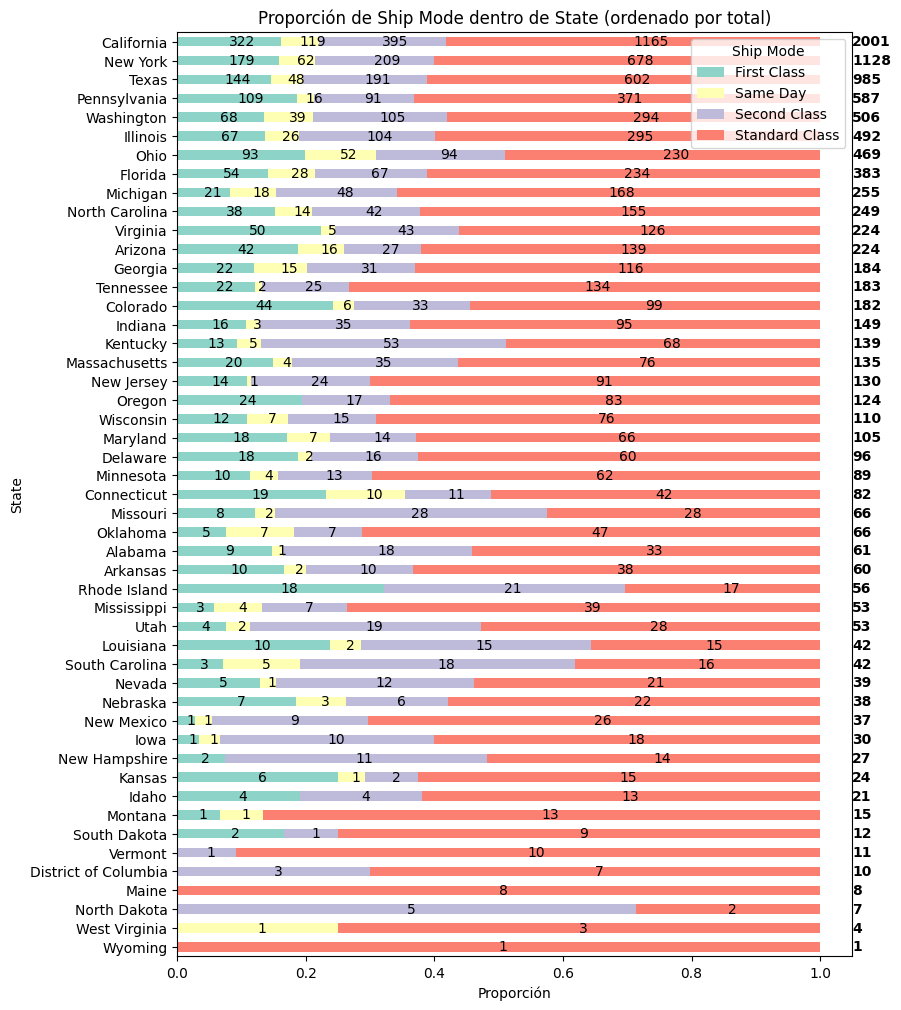

In [43]:
v.plot_categorical_composition(df, 'State', 'Ship Mode')

En términos generales, la gráfica sugiere que los patrones de selección de modos de envío son relativamente consistentes entre los estados.  
Sin embargo, sí que se pueden observar algunas diferencias que merecen una inspección más detallada.  

- Dominio del "Standard Class": En la mayoría de los estados, el modo de envío "Standard Class" es el más seleccionado, lo que sugiere que los clientes priorizan probablemente el ahorro de costos sobre la rapidez del envío.  
Estados como California, Nueva York, Texas y Washington son ejemplos donde más del 50% de los pedidos utilizan este modo de envío.
- Estados con uso más elevado de las opciones premium "First Class" y "Same Day":  
 - California tiene una proporción mayor de "First Class" y "Same Day" en comparación con otros estados.  
 - Nueva York y Texas también muestran un número mayor de envíos de "First Class", lo que puede estar relacionado con las urgencias comerciales en áreas metropolitanas grandes.  
Esto podría indicar que en mercados con mayor competitividad o clientes con mayor capacidad adquisitiva, se seleccionan opciones de envío más rápidas, lo que puede ofrecer oportunidades para estrategias logísticas y de precios más agresivas.  
- Diversidad en modos de envío en estados pequeños:En estados con menos volumen de pedidos, como Rhode Island, Connecticut, y Utah, hay una distribución más balanceada entre "Second Class" y "Standard Class". Esto puede reflejar la naturaleza menos competitiva o más predecible de esos   mercados.  
- Relación con Rentabilidad: Sería interesante correlacionar estos datos con la rentabilidad de los pedidos.  

### 6.3. **Relación entre `State` vs. `Ship Status`**  

**¿Existe algún tipo de patrón entre los diferentes estados y el estado en el que llegan los pedidos?**

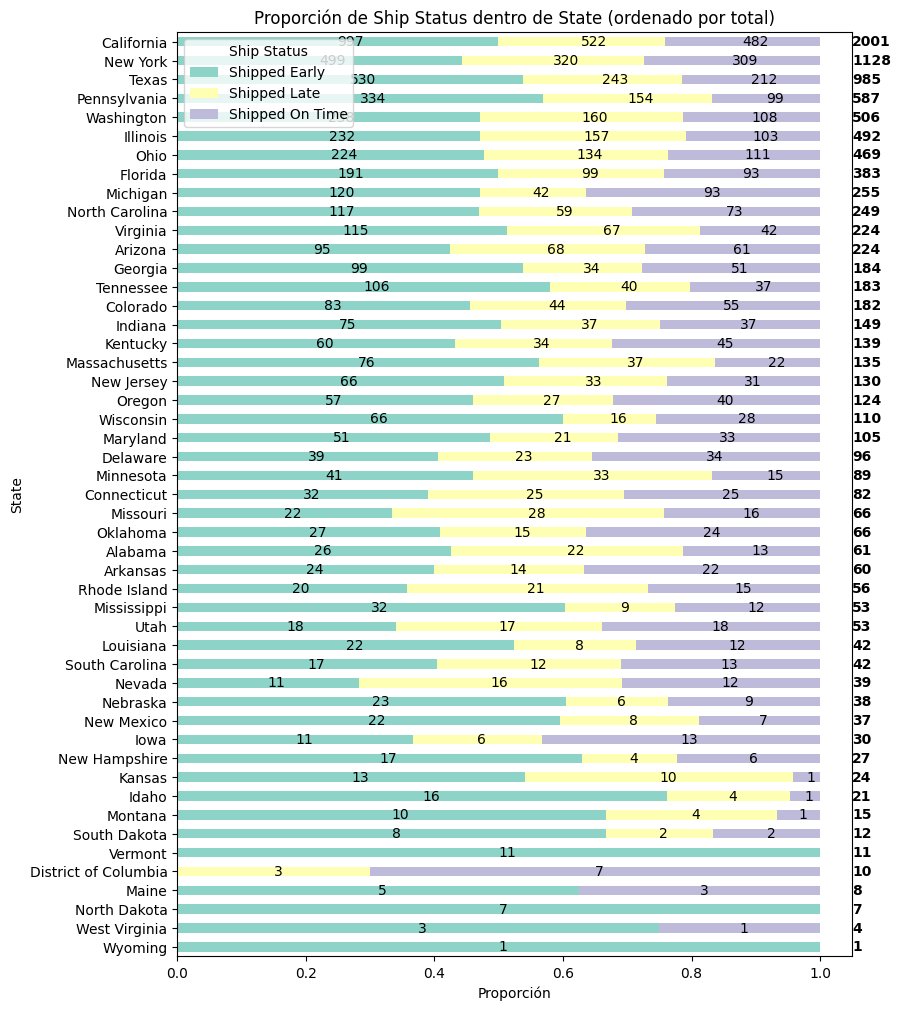

In [47]:
v.plot_categorical_composition(df, 'State', 'Ship Status')

In [ ]:
# gráfica de los valores absolutos de la distribución por 'Ship status'
#v.pinta_distribucion_categoricas(df, ["Ship Status"], relativa=False, mostrar_valores=False)

En términos generales, la distribución de los estados de envío (**Shipped Early**, **Shipped On Time** y **Shipped Late**) es bastante consistente a lo largo de todos los estados.  
La mayoría de los estados muestran un patrón similar en cuanto a la proporción de estados de envío, sin que se observen diferencias extremadamente marcadas entre ellos.


- **`Shipped Early`**: En **términos absolutos y relativos**, el estado **"Shipped Early"** es el más frecuente en casi todos los estados. En muchos casos, más de la **mitad** de los pedidos llegan antes de lo previsto.  
  (tanto en estados con muchos como con pocos pedidos). Como ya se comentó anteriormente, indica una **sobrestimación generalizada** en los tiempos de entrega. Aunque esto podría ser percibido como un "extra" por los clientes, también puede sugerir una **ineficiencia logística**, ya que los tiempos estimados de entrega no están alineados con la realidad.  
  

- **`Shipped On Time`**: El estado **"Shipped On Time"** se encuentra en una **minoría de estados** como el segundo estado más frecuente, pero en términos absolutos representa una proporción mucho menor que **"Shipped Early"**.  
  Esto sugiere que la planificación logística actual está generando un menor número de pedidos que llegan en la fecha prometida, lo que podría ser un área de mejora para **aumentar la precisión en los tiempos de entrega**.

- **`Shipped Late`**: El estado **"Shipped Late"** también es significativo en la mayoría de los estados, donde tiende a tener una proporción regular y similar a **"Shipped On Time"**. Desde el punto de vista de negocio, se trata de una **proporción preocupante**.



### 6.4 **Relación entre `State` vs. `Category`**  

**¿Existe algún tipo de patrón entre los diferentes estados y las vertientes de producto?**

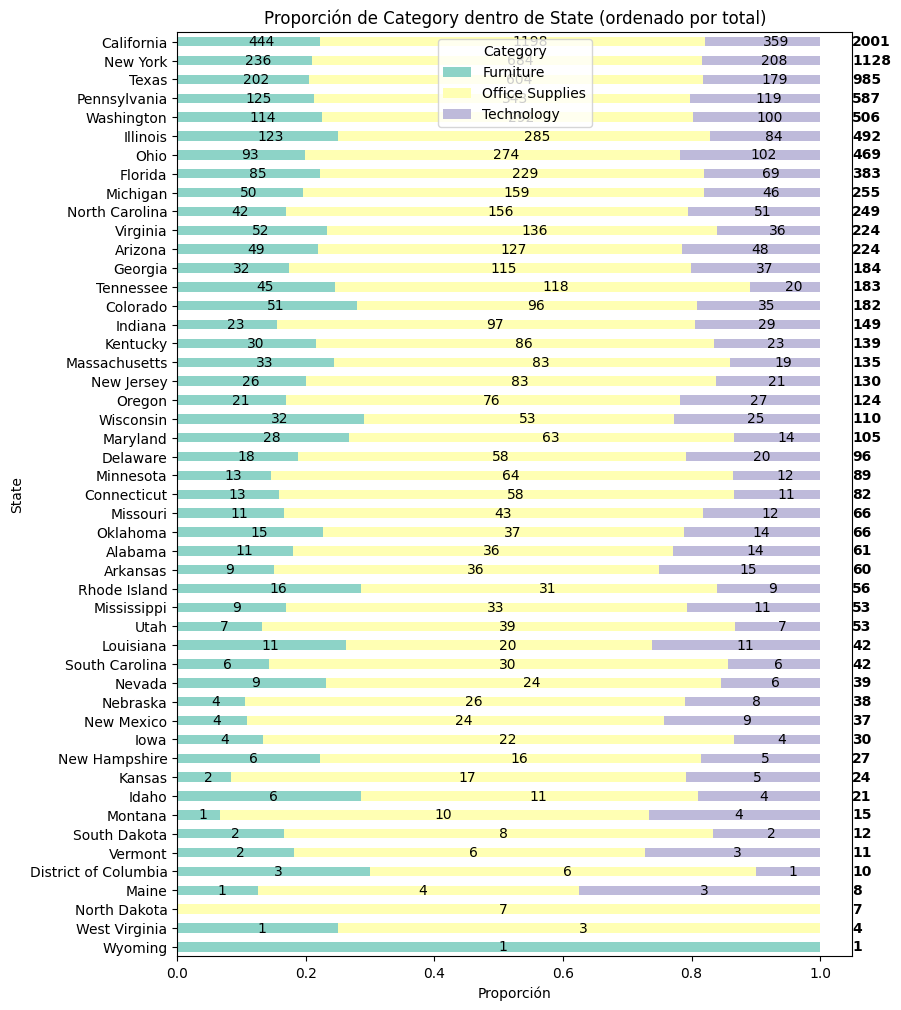

In [45]:
v.plot_categorical_composition(df, 'State', 'Category')

En términos generales, la distribución de las categorías de productos (Furniture, Office Supplies y Technology) es bastante consistente a lo largo de todos los estados.  
La mayoría de los estados muestran un patrón similar en cuanto a la proporción de ventas por categoría, sin que se observen diferencias extremadamente marcadas entre ellos.


- **`Office Supplies`**: En términos absolutos y relativos, la categoría "Office Supplies" es la más frecuente en casi todos los estados.  
 En muchos de ellos, esta categoría representa más de la mitad de los pedidos totales, tanto en estados con un alto volumen de pedidos como en aquellos con menor volumen  
  
- **`Furniture`:**: La categoría "Furniture" tiende a ocupar el segundo lugar en muchos estados, pero en proporción relativa, representa una parte significativamente menor en comparación con Office Supplies.

- **`Technology`**: La categoría "Technology" tiene una presencia relativamente uniforme en la mayoría de los estados, aunque en términos generales es la menos representada, aunque en terminos absolutos a un nivel muy similar que "Furniture"  


### 6.5 **Relación entre `State` vs. `Segment`**  

**¿Existe algún tipo de patrón entre los diferentes estados y los diferentes targets de clientes?**

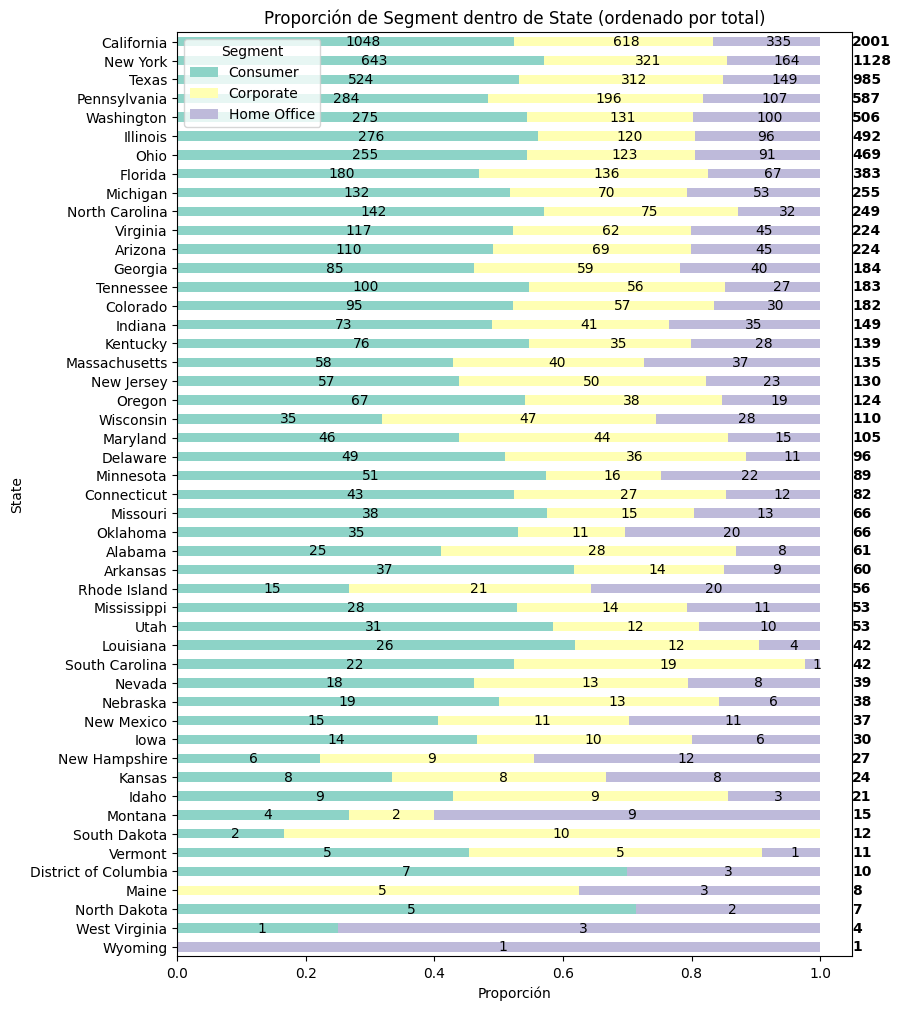

In [46]:
v.plot_categorical_composition(df, 'State', 'Segment')

En términos generales, la distribución de los segmentos de clientes (**Consumer**, **Corporate** y **Home Office**) es bastante consistente a lo largo de todos los estados.  
La mayoría de los estados muestran un patrón similar en cuanto a la proporción de ventas por segmento, sin que se observen diferencias extremadamente marcadas entre ellos.

- **`Consumer`**: En **términos absolutos y relativos**, el segmento **"Consumer"** es el más frecuente en casi todos los estados. En muchos de ellos, este segmento representa **más de la mitad** de los pedidos totales, independientemente del tamaño del mercado estatal.
  - Este comportamiento sugiere que la mayor parte de los ingresos de la compañía provienen del **consumidor final** en lugar de clientes corporativos o de oficinas en casa. Esta tendencia es coherente tanto en estados con muchos pedidos como en aquellos con menor volumen.

- **`Corporate`**: El segmento **"Corporate"** suele ocupar el segundo lugar en la mayoría de los estados, pero en **proporción relativa**, representa una parte significativamente menor en comparación con **Consumer**.
  - Aunque esta categoría es menos predominante, sigue siendo relevante en estados con grandes volúmenes de pedidos, lo que indica que **las ventas B2B (Business to Business)** también juegan un papel importante, aunque secundario.

- **`Home Office`**: El segmento **"Home Office"** tiene una **presencia relativamente estable** en la mayoría de los estados, aunque en **términos generales**, es el segmento menos representado.
  - Esto sugiere que, aunque las compras para oficinas en casa tienen cierto peso, no son un motor importante de ingresos en la mayoría de los estados, al menos en comparación con los otros dos segmentos. Se mantiene una proporción similar en estados con pocos o muchos pedidos.
